# Simple Statistics

In [1]:
import pandas as pd
import numpy as np

#### Read csv files

In [2]:
from pathlib import Path

# creating a relative path to the data folder 
pth = Path('../../data')

In [3]:
# read canvas csv file into a dataframe 
canvas = pd.read_csv(pth / 'canvas.csv')

In [4]:
# read graffito
graffiti = pd.read_csv(pth/'graffiti.csv')

## Combine canvas + graffito

In [5]:
canvas_keep = ['id', 'accessibility']
graffiti_keep =['canvas_id', 'message', 'num']

In [6]:
df = ( canvas.loc[:, canvas_keep]
             .merge(graffiti.loc[:, graffiti_keep], how='inner', left_on='id', right_on='canvas_id')
)
               

### Create accessibility level variable

In [7]:
# define function that split string into a list of separate terms and returns number of terms
def nstrings(row, col):
  '''
  Return number of strings in column
    '''
  return len(row[col].replace(' ','').split(','))

In [8]:
# create acc_level variable
df['acc_level'] = df.apply(nstrings, col='accessibility', axis='columns')

In [9]:
df['acc_level']

0       1
1       1
2       1
3       1
4       1
       ..
3628    1
3629    1
3630    1
3631    1
3632    1
Name: acc_level, Length: 3633, dtype: int64

## Create samples

In [10]:
# create sample
smp = df.sample(frac=0.01, random_state=3) #13
len(smp)

36

In [11]:
# create a dataframe with the remainder
rmder = df.drop(smp.index)
len(rmder)

3597

In [12]:
tb1 = smp.message.value_counts()
tb2 = rmder.message.value_counts()
tbl = (pd.merge(tb1, tb2, how='outer', on='message')
         .rename(columns = {'count_x': 'sample1', 'count_y': 'sample2'})
         .fillna(0)
)
tbl

,sample1,sample2
message,,
other,3.0,232
political,0.0,94
sexual,2.0,28
social,0.0,190
writter,13.0,1498


## Chi Squared test ( $\chi^2$) of independence

Test used when we are have categories (no order). The main data used are counts (not percentages!). We assume that the distribution of counts across the different categories is *similar* for both cases (for both samples). By similar here we mean that both samples could have come from the same population.

*Assumed hypothesis*

> $H_0$: Both samples have the same distribution of counts across categories


*Alternative hypothesis*

> $H_1$: Both samples have differentdistribution of counts across categories

We find the $\chi^2$ given both samples. If the probability associated wit this statistic is small (< 0.05), we say that the difference between the samples is significant for us to reject $H_0$ and therefore conclude that it is likely that there is real a difference between both samples.

*Assumptions* 

To be able to run this test, all expected frequencies have to be greater than 1 and at least 80% of the cells should have frequencies of 5 or bigger.

In [13]:
from scipy.stats import chi2_contingency

ch2, p, dof, expected = chi2_contingency(tbl)
p

np.float64(0.005682042645290531)

In [14]:
np.set_printoptions(suppress=True);

In [15]:
expected

array([[   2.05339806,  232.94660194],
       [   0.82135922,   93.17864078],
       [   0.26213592,   29.73786408],
       [   1.66019417,  188.33980583],
       [  13.20291262, 1497.79708738]])

# Kolmogorov- Smirnov (KS test)

We assume that the distribution of counts across the different categories is *similar* for both cases (for both samples).

By similar here we mean that both samples could have come from the same population.

*Assumed hypothesis*

> $H_0$: Both samples have the same distribution of cumulative percentages across categories


*Alternative hypothesis*

> $H_1$: Both samples have different distribution of cumulative percentages across categories

## Create samples

In [16]:
tb1 = smp.acc_level.value_counts()
tb2 = rmder.acc_level.value_counts()
tbl = (pd.merge(tb1, tb2, how='outer', on='acc_level')
         .rename(columns = {'count_x': 'sample1', 'count_y': 'sample2'})
         .fillna(0)
)
tbl

,sample1,sample2
acc_level,,
1,35.0,3440
2,1.0,111
3,0.0,30
4,0.0,14
5,0.0,2


In [17]:
rslt = tbl.cumsum()*100 / tbl.sum( axis='index')
rslt

,sample1,sample2
acc_level,,
1,97.222222,95.635252
2,100.000000,98.721157
3,100.000000,99.555185
4,100.000000,99.944398
5,100.000000,100.000000


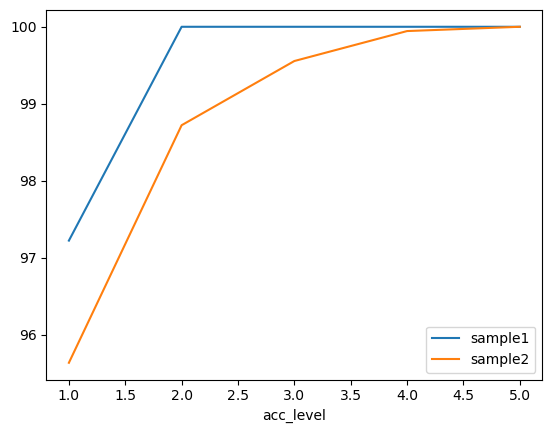

In [18]:
_ =rslt.plot(kind='line')

In [19]:
from scipy.stats import ks_2samp

ks, p = ks_2samp(tbl.sample1, tbl.sample2)
p

np.float64(0.07936507936507936)